In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "marginal_distributions"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.019444,0.050680,0.047000,0.020023,-0.079821,-0.019076,0.100710,-0.054529,0.055973,-0.031498,94.037278
1,-0.094602,0.050680,0.081956,0.110069,0.081378,-0.048219,0.103294,-0.039108,-0.024480,0.058464,53.814405
2,0.045774,-0.044642,0.015545,-0.092939,-0.071185,0.190053,0.000616,0.039511,0.124000,0.118003,87.038079
3,0.017477,0.050680,0.111235,0.061715,-0.011817,0.025722,0.091767,0.070413,0.031588,-0.113202,310.587333
4,-0.004531,-0.044642,-0.062714,-0.041554,0.076711,-0.089826,0.109816,0.065863,-0.022113,0.058227,56.339538
5,0.090766,-0.044642,-0.089459,0.075395,-0.046035,0.036219,-0.001866,0.110737,-0.064772,-0.093837,300.880163
6,-0.106350,-0.044642,0.052601,-0.098554,-0.088592,0.187867,0.062129,-0.052967,-0.101130,0.104009,337.440929
7,0.034659,0.050680,-0.076829,0.116468,0.080161,0.187658,0.125363,0.163885,-0.050752,0.135003,66.236283
8,-0.079067,-0.044642,0.108354,0.095406,0.070952,-0.085495,0.016815,-0.051232,0.065464,0.044106,314.967106
9,0.028604,0.050680,-0.083878,0.056493,-0.007182,-0.039734,-0.005883,-0.020752,-0.061132,0.020101,146.577307


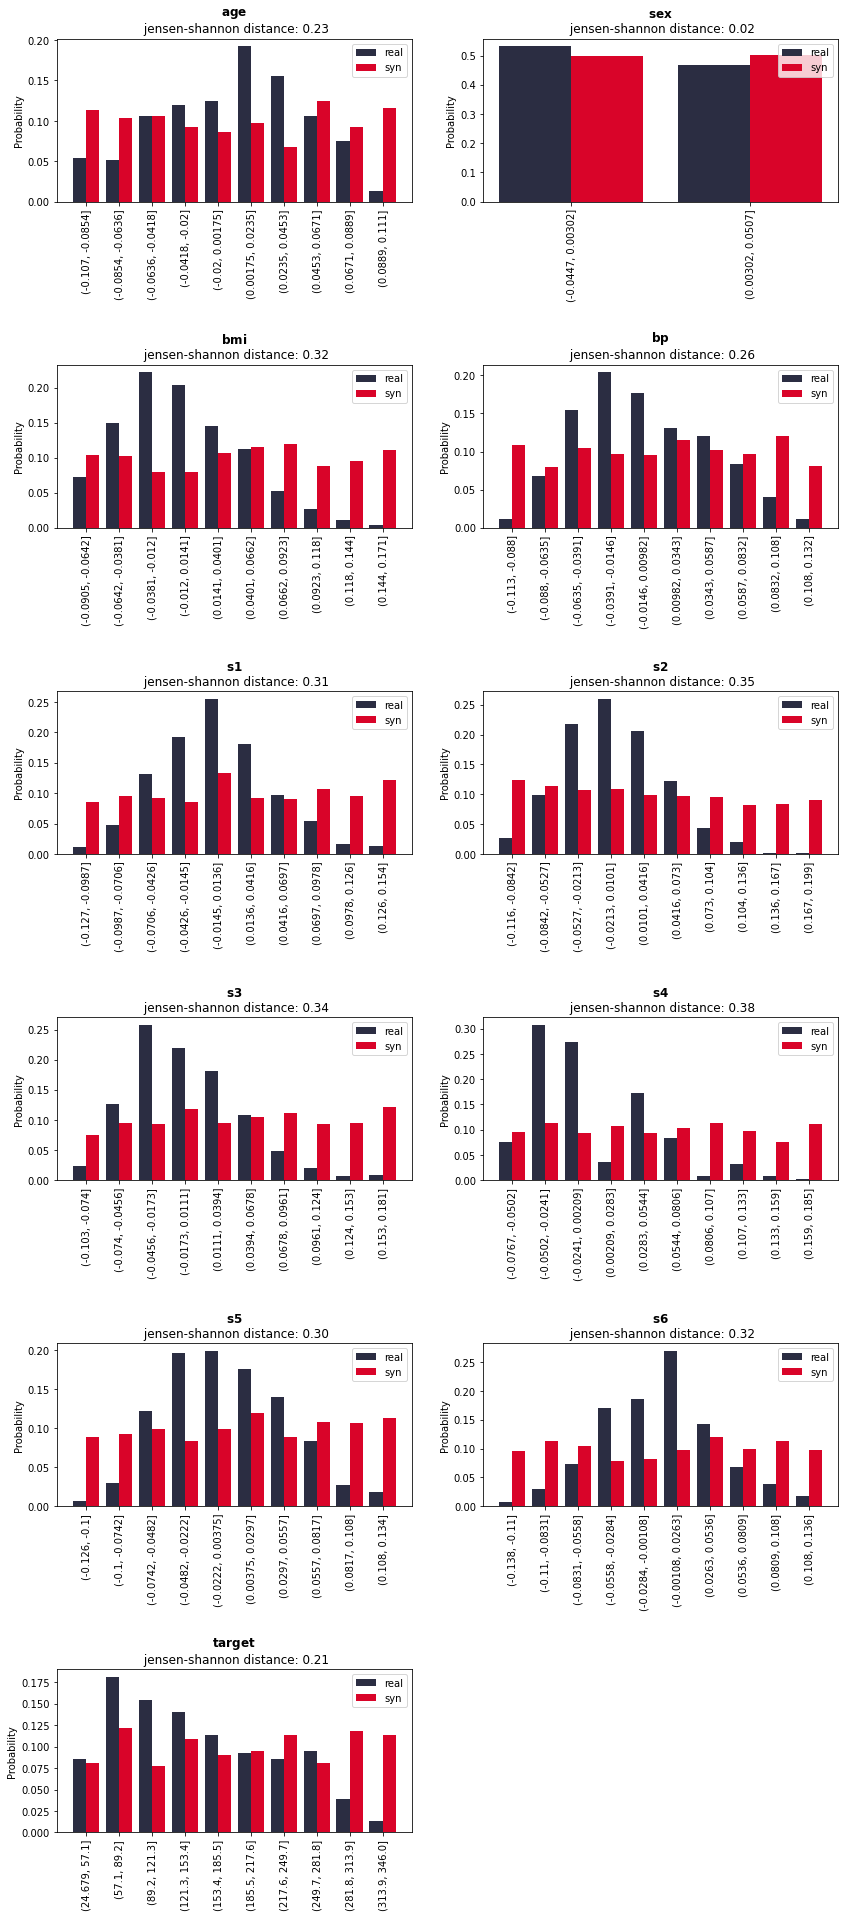

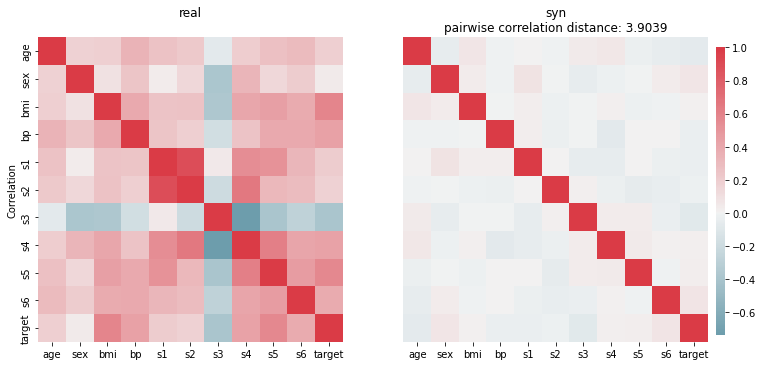

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : marginal_distributions


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.0
sanity.common_rows_proportion,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.01
sanity.avg_distance_nearest_neighbor,0.118853,0.223489,0.167418,0.043046,0.159913,0.052318,3,0,0.01
sanity.inlier_probability,0.606335,0.866516,0.740573,0.10638,0.748869,0.13009,3,0,0.01
sanity.outlier_probability,0.002262,0.013575,0.006787,0.004887,0.004525,0.005656,3,0,0.01
statistical.inverse_kl_divergence,0.773934,0.782498,0.779618,0.00402,0.782424,0.004282,3,0,0.02
statistical.kolmogorov_smirnov_test,0.754833,0.768614,0.763403,0.006107,0.766763,0.00689,3,0,0.01
statistical.chi_squared_test,0.996535,0.998493,0.997505,0.0008,0.997487,0.000979,3,0,0.03
statistical.maximum_mean_discrepancy,0.005358,0.006007,0.005634,0.000274,0.005538,0.000325,3,0,0.03
statistical.inverse_cdf_distance,1.43023,1.500018,1.474282,0.031296,1.492598,0.034894,3,0,6.14
